In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("data/penal_df.csv")

In [3]:
df.head()

,org_idradactual,exp_cuij,org_idintpri,org_cod_pri,org_descorta_pri,org_descr_Pri,org_idintseg,est_id,est_descr,exp_anio,...,den_v_domestica,den_v_genero,den_zon_id,den_zona,filter_.,org_destino_act,PrimarioDen_id,PrimarioDen_id_oju,PrimarioExp_id,PrimarioExp_oju
0,72,01-00042685-3,72,JUZP01,JUZGADO N°1,JUZGADO DE 1RA INSTANCIA EN LO PENAL CONTRAVEN...,unknown,1,ASIGNADO,2016,...,NaN,NaN,unknown,unknown,1,unknown,1,1,1,1
1,72,01-00039012-3,72,JUZP01,JUZGADO N°1,JUZGADO DE 1RA INSTANCIA EN LO PENAL CONTRAVEN...,unknown,14,ARCHIVADO,2016,...,NaN,NaN,unknown,unknown,1,unknown,1,1,1,1
2,72,01-00035028-8,72,JUZP01,JUZGADO N°1,JUZGADO DE 1RA INSTANCIA EN LO PENAL CONTRAVEN...,unknown,1,ASIGNADO,2016,...,NaN,NaN,unknown,unknown,1,unknown,1,1,1,1
3,72,01-00036824-1,72,JUZP01,JUZGADO N°1,JUZGADO DE 1RA INSTANCIA EN LO PENAL CONTRAVEN...,unknown,14,ARCHIVADO,2016,...,NaN,NaN,unknown,unknown,1,unknown,1,1,1,1
4,72,01-00034124-6,72,JUZP01,JUZGADO N°1,JUZGADO DE 1RA INSTANCIA EN LO PENAL CONTRAVEN...,unknown,14,ARCHIVADO,2016,...,NaN,NaN,unknown,unknown,1,unknown,1,1,1,1


In [4]:
df.shape

(37136, 59)

In [5]:
df.info(memory_usage=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37136 entries, 0 to 37135
Data columns (total 59 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   org_idradactual      37136 non-null  int64 
 1   exp_cuij             37136 non-null  object
 2   org_idintpri         37136 non-null  int64 
 3   org_cod_pri          37136 non-null  object
 4   org_descorta_pri     37136 non-null  object
 5   org_descr_Pri        37136 non-null  object
 6   org_idintseg         37136 non-null  object
 7   est_id               37136 non-null  int64 
 8   est_descr            37136 non-null  object
 9   exp_anio             37136 non-null  int64 
 10  exp_cuerpos          37136 non-null  int64 
 11  exp_fojas            37136 non-null  int64 
 12  exp_detenidos        37136 non-null  object
 13  exp_id               37136 non-null  int64 
 14  exp_sufijo           37136 non-null  int64 
 15  exp_fechecho         13163 non-null  object
 16  exp_

In [70]:
df_diccionario = pd.read_excel("data/diccionario de datos ingresos a juzg.xlsx",coding="utf-8")
values = df_diccionario.values
features_name_from_dic = []
for x in values:
    features_name_from_dic.append(x[0])

In [67]:
col_names = list(df.columns)

In [89]:
def check_list(a,b):
    not_in_common = []
    for x in b:
        if (x not in a) and (x not in not_in_common):
            not_in_common.append(x)
    return(not_in_common)
            
        

In [90]:
check_list(col_names,features_name_from_dic)

['den_altura',
 'den_entre_calle1_id',
 'den_entre_calle2_id',
 'den_calle_texto',
 'den_lugar_hecho',
 'exp_lughecho']

In [ ]:
def listas(a, b):
    lista_final = []
    for i in a:
        if (i not in lista_final) and (i in b):
            lista_final.append(i)
    return lista_final

In [6]:
def plot_nulls(df):
    nulls = pd.DataFrame((df.isnull().sum().sort_values()/len(df)*100).round(2),columns=['pct_null'])
    nulls = nulls.loc[nulls['pct_null']>0]
    plt.figure(figsize=(12,8))
    ax = nulls['pct_null'].plot.barh()
    ax.set_title('Porcentaje de valores nulos en cada columna',fontsize=20, y=1.02)
    ax.set_xlabel('Porcentaje del total %', fontsize=16)
    ax.set_ylabel('columnas', fontsize=16)
    ax.grid(axis='x')

    for y, x in enumerate(nulls['pct_null']):
        ax.text(x, y, s=str(x)+'%', color='black', fontweight='bold',va='center')
        
    plt.show()
    
    print(nulls.shape)


   

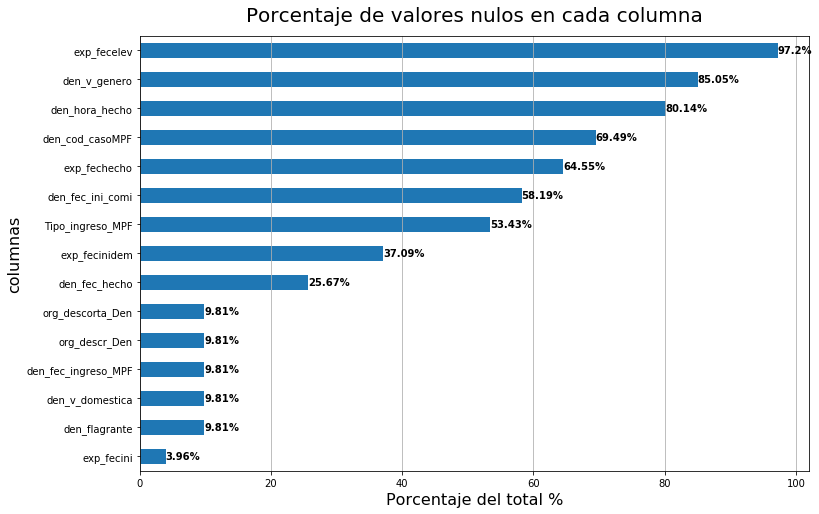

(15, 1)


In [7]:
plot_nulls(df)

El dataset tiene 59 features y 37136 filas. Ocupa 16.7mb, que no es mucho pero se puede optimizar, hay varias columnas con valores booleanos que no hace falta que esas columnas estén como int64. 

Veo una discrepancia entre el diccionario de datos proporcionado por el juzgado y la cantidad de features que tenemos en el dataset.

Tenemos 44 features con strings dentro de sus valores. Más adelante veremos si realmente son variables categóricas o si están mal cargado los datos. 
Va a ser todo un desafío encodear todas esas variables en valores númericos.

Solo 15 de las 59 features, tienen valores nulos en alguna de sus filas. Con valores que oscilan entre el 3,96% y el 97,2% para la feature que más nulos tiene.

### org_idintpri, org_descorta_pri, org_cod_pri, org_descr_Pri y org_idradactual

In [8]:
df['org_idintpri'].value_counts().shape

(32,)

In [9]:
df['org_descorta_pri'].value_counts().shape

(32,)

In [10]:
df['org_cod_pri'].value_counts().shape

(32,)

In [11]:
df["org_descr_Pri"].value_counts().shape

(32,)

In [12]:
df["org_idradactual"].value_counts().shape

(32,)

In [13]:
df.loc[df["org_idradactual"] != df["org_idintpri"]].shape[0]

1613

In [14]:
1613/len(df)*100

4.343494183541577

Primera información valiosa que extraemos del dataset, aparentemente hay 32 juzgados en la ciudad de Buenos Aires. También vemos la primera optimización de memoria que podemos hacer, hay 4 columnas que representan exactamente lo mismo. 

Que un caso se inicialice en un juzgado y luego lleve otro la causa, los datos nos dicen que no es algo muy común. Son solo 1613 casos, un 4,34% del total.

In [15]:
df["org_idintseg"].value_counts()

unknown    36096
1004         357
1006         356
1005         327
Name: org_idintseg, dtype: int64

'org_idintseg' que representa "el código numérico de la Sala que recibió el recurso en el caso que haya sido apelado", según el diccionario que nos facilitaron, tiene en la mayoría de sus filas valor "unknown". 

Acá me surge la duda de si esto significa que la totalidad  de las filas que tienen este valor son casos que no fueron apelados o si realmente hay valores nulos.

### est_id y est_descr

In [16]:
df['est_id'].value_counts().shape

(16,)

In [17]:
def plot_pct(column,kind):
    plt.figure(figsize=(12,8))
    data = ((df[column].value_counts())/len(df) * 100).round(3)
    data.plot(kind=kind)
    plt.title(column,fontdict={'fontsize':16})
    plt.xlabel("Porcentaje")
    if kind == "barh":
        for y, x in enumerate(data):
            plt.text(x, y, s=str(x)+'%', color='black', fontweight='bold',va='center')
    else:
        for y, x in enumerate(data):
            plt.text(y-0.2, x+0.35, s=str(x)+'%', color='black', fontweight='bold',va='center')
    plt.show()

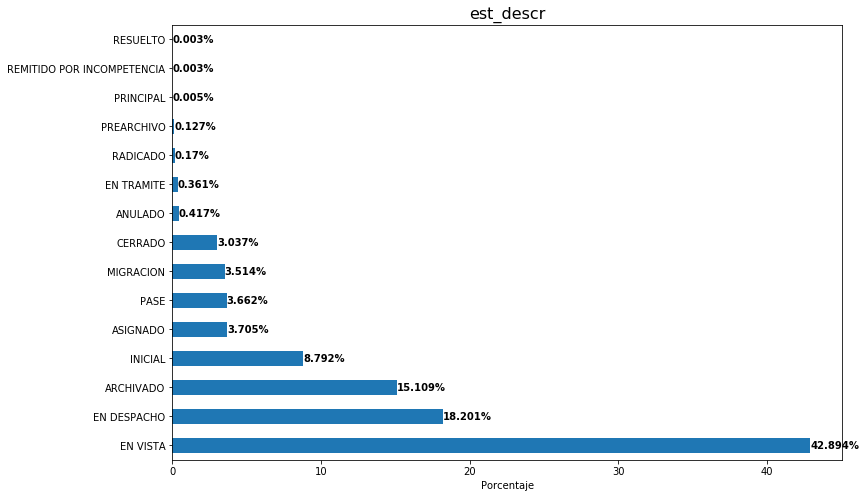

In [18]:
plot_pct("est_descr","barh")

En estas dos features, al igual que con las anteriores, también vemos que represetan exactamente lo mismo. En este caso, la descripción del estado del expediente. Hay 16 estados posibles.

## exp_anio

In [19]:
df["exp_anio"].value_counts()

2019    15492
2018     8610
2016     7121
2017     5911
2015        2
Name: exp_anio, dtype: int64

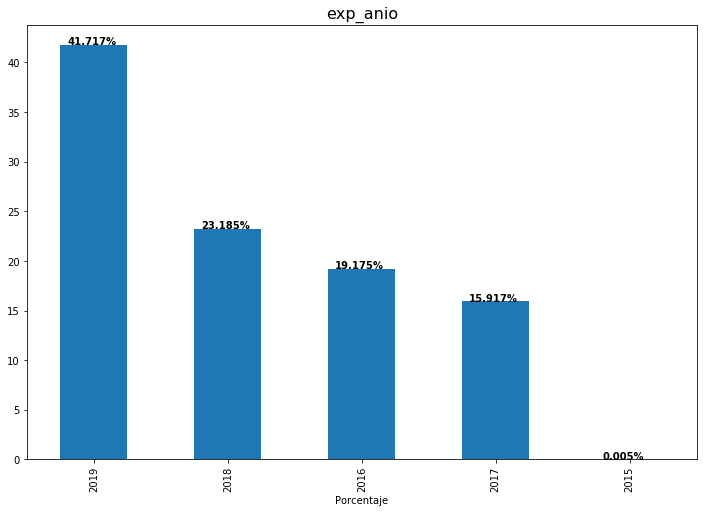

In [20]:
plot_pct("exp_anio","bar")

Los datos que nos proporcionaron provienen de los últimos 5 años. Cabe notar que el número de expedientes va aumentando año a año. En el año 2015, solo tenemos dos datos.

## exp_detenidos

In [21]:
df["exp_detenidos"].value_counts()

unknown    24082
0          12991
1             63
Name: exp_detenidos, dtype: int64

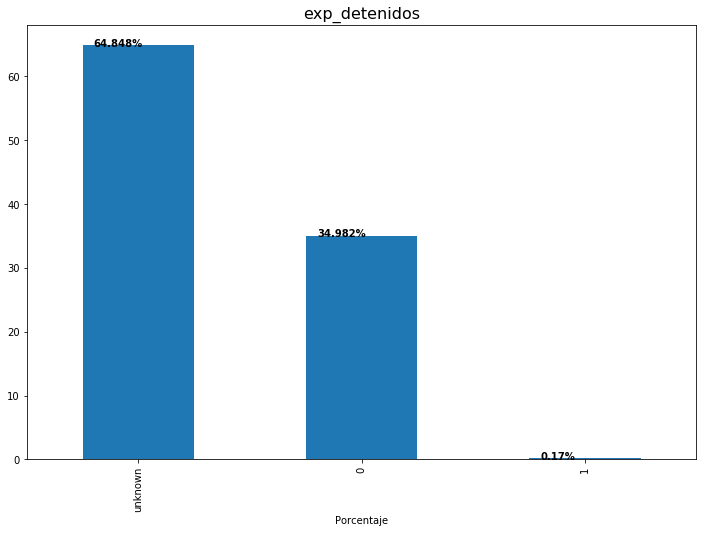

In [22]:
plot_pct("exp_detenidos","bar")

Esta feature nos indica si hay o no detenidos en el expediente. El 65% de las filas tiene "unknown", es decir, valores nulos. En este punto, queda claro que el primer gráfico no es del todo correcto, ya que columnas con este tipo de valores no es la primera vez que aparecen.


## oju_descr y oju_id

In [23]:
df["oju_descr"].value_counts().sort_values(ascending=False).head(6)

149 BIS - AMENAZAS                                                                                                   6131
149 BIS  - AMENAZAS - CP (P/ L 2303)                                                                                 5108
183 - DAÑOS                                                                                                          3241
128 1 PARR - DELITOS ATINENTES A LA PORNOGRAFIA (PRODUCIR/PUBLICAR IMAGENES PORNOGR. C MENORES 18)                   2800
89  - LESIONES LEVES                                                                                                 1989
128 1 PARR - DELITOS ATINENTES A LA PORNOGRAFIA (PRODUCIR/PUBLICAR IMAGENES PORNOGR. C MENORES 18) CP (P/ L 2303)    1886
Name: oju_descr, dtype: int64

Presuntamente se cometieron 287 tipos de delitos diferentes. Son 5 más frecuentes, en nuestros datos, son: amenazadas, daños, delitos atienentes a la pornografía infantil y lesiones leves.
Parece ser que hay algo de solapamiento en las descripciones de los delitos. Los más representados, son amenazas pero tienen carátulas distintas.

In [33]:
# Reemplazo de "unknown" por np.nan

In [30]:
df.replace(to_replace="unknown",value=np.nan, inplace=True)

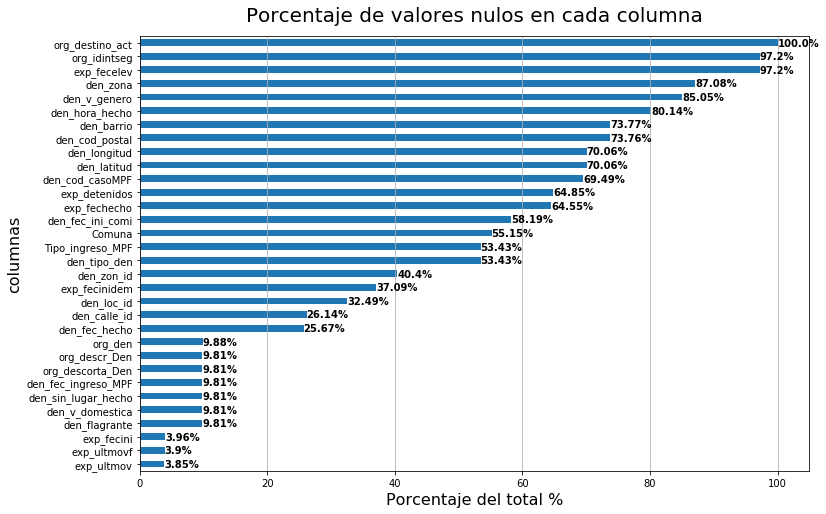

(32, 1)


In [32]:
plot_nulls(df)

### den_cod_casoMPF

In [40]:
df["Comuna"].value_counts(dropna=False).sort_values()

2        616
12       658
13       668
10       703
5        705
11       707
6        713
15       824
14       896
9       1082
8       1137
3       1478
4       1755
7       1777
1       2938
NaN    20479
Name: Comuna, dtype: int64

In [75]:
df["den_altura"]

KeyError: 'den_altura'